In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 1.2382 - categorical cross entropy: 1.2382 - mean squared error: 0.0782 - accuracy: 0.6492 - auc: 0.6465 - prc: 0.1933

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


29/29 [==============================] - 146s 3s/step - loss: 1.2382 - categorical cross entropy: 1.2382 - mean squared error: 0.0782 - accuracy: 0.6492 - auc: 0.6465 - prc: 0.1933 - val_loss: 1.4548 - val_categorical cross entropy: 1.4548 - val_mean squared error: 0.0970 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 2/200
29/29 [==============================] - ETA: 0s - loss: 0.9369 - categorical cross entropy: 0.9369 - mean squared error: 0.0615 - accuracy: 0.6686 - auc: 0.8030 - prc: 0.2413

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_2\assets


29/29 [==============================] - 71s 3s/step - loss: 0.9369 - categorical cross entropy: 0.9369 - mean squared error: 0.0615 - accuracy: 0.6686 - auc: 0.8030 - prc: 0.2413 - val_loss: 1.4418 - val_categorical cross entropy: 1.4418 - val_mean squared error: 0.0978 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 3/200
29/29 [==============================] - 17s 581ms/step - loss: 0.9474 - categorical cross entropy: 0.9474 - mean squared error: 0.0616 - accuracy: 0.6460 - auc: 0.7956 - prc: 0.2546 - val_loss: 1.5071 - val_categorical cross entropy: 1.5071 - val_mean squared error: 0.1023 - val_accuracy: 0.6705 - val_auc: 0.4964 - val_prc: 0.1410 - lr: 0.0010
Epoch 4/200
29/29 [==============================] - 15s 518ms/step - loss: 0.8620 - categorical cross entropy: 0.8620 - mean squared error: 0.0567 - accuracy: 0.6707 - auc: 0.8357 - prc: 0.2701 - val_loss: 1.5693 - val_categorical cross entropy: 1.5693 - val_mean squared error: 0.1056 - val_accu

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_7\assets


29/29 [==============================] - 71s 3s/step - loss: 0.8261 - categorical cross entropy: 0.8261 - mean squared error: 0.0553 - accuracy: 0.7015 - auc: 0.8385 - prc: 0.2821 - val_loss: 1.0037 - val_categorical cross entropy: 1.0037 - val_mean squared error: 0.0588 - val_accuracy: 0.7035 - val_auc: 0.8091 - val_prc: 0.2632 - lr: 0.0010
Epoch 8/200
29/29 [==============================] - ETA: 0s - loss: 0.8086 - categorical cross entropy: 0.8086 - mean squared error: 0.0558 - accuracy: 0.6923 - auc: 0.8583 - prc: 0.2997

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_8\assets


29/29 [==============================] - 73s 3s/step - loss: 0.8086 - categorical cross entropy: 0.8086 - mean squared error: 0.0558 - accuracy: 0.6923 - auc: 0.8583 - prc: 0.2997 - val_loss: 0.9341 - val_categorical cross entropy: 0.9341 - val_mean squared error: 0.0599 - val_accuracy: 0.6910 - val_auc: 0.8210 - val_prc: 0.2950 - lr: 0.0010
Epoch 9/200
29/29 [==============================] - ETA: 0s - loss: 0.8511 - categorical cross entropy: 0.8511 - mean squared error: 0.0578 - accuracy: 0.6805 - auc: 0.8592 - prc: 0.3041

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_9\assets


29/29 [==============================] - 71s 3s/step - loss: 0.8511 - categorical cross entropy: 0.8511 - mean squared error: 0.0578 - accuracy: 0.6805 - auc: 0.8592 - prc: 0.3041 - val_loss: 0.8916 - val_categorical cross entropy: 0.8916 - val_mean squared error: 0.0587 - val_accuracy: 0.6960 - val_auc: 0.8321 - val_prc: 0.3237 - lr: 0.0010
Epoch 10/200
29/29 [==============================] - 12s 407ms/step - loss: 0.7715 - categorical cross entropy: 0.7715 - mean squared error: 0.0525 - accuracy: 0.7225 - auc: 0.8780 - prc: 0.3102 - val_loss: 0.9068 - val_categorical cross entropy: 0.9068 - val_mean squared error: 0.0604 - val_accuracy: 0.6860 - val_auc: 0.8546 - val_prc: 0.3118 - lr: 0.0010
Epoch 11/200
29/29 [==============================] - 13s 467ms/step - loss: 0.8316 - categorical cross entropy: 0.8316 - mean squared error: 0.0569 - accuracy: 0.6875 - auc: 0.8630 - prc: 0.3151 - val_loss: 1.0001 - val_categorical cross entropy: 1.0001 - val_mean squared error: 0.0652 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_14\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_14\assets


29/29 [==============================] - 75s 3s/step - loss: 0.7653 - categorical cross entropy: 0.7653 - mean squared error: 0.0526 - accuracy: 0.7198 - auc: 0.8703 - prc: 0.3422 - val_loss: 0.7724 - val_categorical cross entropy: 0.7724 - val_mean squared error: 0.0527 - val_accuracy: 0.7160 - val_auc: 0.8808 - val_prc: 0.3300 - lr: 0.0010
Epoch 15/200
29/29 [==============================] - 12s 417ms/step - loss: 0.8328 - categorical cross entropy: 0.8328 - mean squared error: 0.0568 - accuracy: 0.7139 - auc: 0.8664 - prc: 0.3350 - val_loss: 0.8306 - val_categorical cross entropy: 0.8306 - val_mean squared error: 0.0554 - val_accuracy: 0.7055 - val_auc: 0.8545 - val_prc: 0.3141 - lr: 0.0010
Epoch 16/200
29/29 [==============================] - ETA: 0s - loss: 0.7527 - categorical cross entropy: 0.7527 - mean squared error: 0.0518 - accuracy: 0.7306 - auc: 0.8859 - prc: 0.3442

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_16\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_16\assets


29/29 [==============================] - 75s 3s/step - loss: 0.7527 - categorical cross entropy: 0.7527 - mean squared error: 0.0518 - accuracy: 0.7306 - auc: 0.8859 - prc: 0.3442 - val_loss: 0.7663 - val_categorical cross entropy: 0.7663 - val_mean squared error: 0.0542 - val_accuracy: 0.7035 - val_auc: 0.8948 - val_prc: 0.3640 - lr: 0.0010
Epoch 17/200
29/29 [==============================] - 12s 413ms/step - loss: 0.7340 - categorical cross entropy: 0.7340 - mean squared error: 0.0504 - accuracy: 0.7387 - auc: 0.8920 - prc: 0.3593 - val_loss: 0.8230 - val_categorical cross entropy: 0.8230 - val_mean squared error: 0.0561 - val_accuracy: 0.6945 - val_auc: 0.8835 - val_prc: 0.3519 - lr: 0.0010
Epoch 18/200
29/29 [==============================] - 12s 409ms/step - loss: 0.7274 - categorical cross entropy: 0.7274 - mean squared error: 0.0508 - accuracy: 0.7425 - auc: 0.8820 - prc: 0.3680 - val_loss: 0.8339 - val_categorical cross entropy: 0.8339 - val_mean squared error: 0.0569 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_27\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_27\assets


29/29 [==============================] - 86s 3s/step - loss: 0.7101 - categorical cross entropy: 0.7101 - mean squared error: 0.0490 - accuracy: 0.7489 - auc: 0.8955 - prc: 0.3994 - val_loss: 0.7440 - val_categorical cross entropy: 0.7440 - val_mean squared error: 0.0547 - val_accuracy: 0.6900 - val_auc: 0.8925 - val_prc: 0.4414 - lr: 9.5000e-04
Epoch 28/200
29/29 [==============================] - 12s 410ms/step - loss: 0.7184 - categorical cross entropy: 0.7184 - mean squared error: 0.0504 - accuracy: 0.7392 - auc: 0.8975 - prc: 0.3778 - val_loss: 0.7808 - val_categorical cross entropy: 0.7808 - val_mean squared error: 0.0575 - val_accuracy: 0.6785 - val_auc: 0.8874 - val_prc: 0.3975 - lr: 9.5000e-04
Epoch 29/200
29/29 [==============================] - 12s 415ms/step - loss: 0.6821 - categorical cross entropy: 0.6821 - mean squared error: 0.0486 - accuracy: 0.7452 - auc: 0.8980 - prc: 0.4084 - val_loss: 0.8672 - val_categorical cross entropy: 0.8672 - val_mean squared error: 0.0587 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_30\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_30\assets


29/29 [==============================] - 72s 3s/step - loss: 0.7527 - categorical cross entropy: 0.7527 - mean squared error: 0.0532 - accuracy: 0.7247 - auc: 0.8939 - prc: 0.4176 - val_loss: 0.7369 - val_categorical cross entropy: 0.7369 - val_mean squared error: 0.0526 - val_accuracy: 0.7185 - val_auc: 0.8955 - val_prc: 0.4584 - lr: 9.5000e-04
Epoch 31/200
29/29 [==============================] - ETA: 0s - loss: 0.6621 - categorical cross entropy: 0.6621 - mean squared error: 0.0470 - accuracy: 0.7543 - auc: 0.9120 - prc: 0.4355

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_31\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_31\assets


29/29 [==============================] - 75s 3s/step - loss: 0.6621 - categorical cross entropy: 0.6621 - mean squared error: 0.0470 - accuracy: 0.7543 - auc: 0.9120 - prc: 0.4355 - val_loss: 0.7319 - val_categorical cross entropy: 0.7319 - val_mean squared error: 0.0530 - val_accuracy: 0.7020 - val_auc: 0.8997 - val_prc: 0.4432 - lr: 9.5000e-04
Epoch 32/200
29/29 [==============================] - 12s 412ms/step - loss: 0.6377 - categorical cross entropy: 0.6377 - mean squared error: 0.0448 - accuracy: 0.7699 - auc: 0.9154 - prc: 0.4221 - val_loss: 0.7611 - val_categorical cross entropy: 0.7611 - val_mean squared error: 0.0560 - val_accuracy: 0.7030 - val_auc: 0.8999 - val_prc: 0.4600 - lr: 9.5000e-04
Epoch 33/200
29/29 [==============================] - ETA: 0s - loss: 0.6925 - categorical cross entropy: 0.6925 - mean squared error: 0.0493 - accuracy: 0.7505 - auc: 0.9066 - prc: 0.3965

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_33\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_33\assets


29/29 [==============================] - 75s 3s/step - loss: 0.6925 - categorical cross entropy: 0.6925 - mean squared error: 0.0493 - accuracy: 0.7505 - auc: 0.9066 - prc: 0.3965 - val_loss: 0.6957 - val_categorical cross entropy: 0.6957 - val_mean squared error: 0.0484 - val_accuracy: 0.7520 - val_auc: 0.9002 - val_prc: 0.4424 - lr: 9.5000e-04
Epoch 34/200
29/29 [==============================] - 12s 413ms/step - loss: 0.6692 - categorical cross entropy: 0.6692 - mean squared error: 0.0472 - accuracy: 0.7575 - auc: 0.9016 - prc: 0.4363 - val_loss: 0.7202 - val_categorical cross entropy: 0.7202 - val_mean squared error: 0.0506 - val_accuracy: 0.7265 - val_auc: 0.9057 - val_prc: 0.4645 - lr: 9.5000e-04
Epoch 35/200
29/29 [==============================] - ETA: 0s - loss: 0.6885 - categorical cross entropy: 0.6885 - mean squared error: 0.0474 - accuracy: 0.7548 - auc: 0.9022 - prc: 0.4180

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_35\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_35\assets


29/29 [==============================] - 75s 3s/step - loss: 0.6885 - categorical cross entropy: 0.6885 - mean squared error: 0.0474 - accuracy: 0.7548 - auc: 0.9022 - prc: 0.4180 - val_loss: 0.6846 - val_categorical cross entropy: 0.6846 - val_mean squared error: 0.0482 - val_accuracy: 0.7505 - val_auc: 0.8963 - val_prc: 0.5059 - lr: 9.5000e-04
Epoch 36/200
29/29 [==============================] - 12s 411ms/step - loss: 0.6721 - categorical cross entropy: 0.6721 - mean squared error: 0.0478 - accuracy: 0.7516 - auc: 0.9138 - prc: 0.4447 - val_loss: 0.7104 - val_categorical cross entropy: 0.7104 - val_mean squared error: 0.0500 - val_accuracy: 0.7480 - val_auc: 0.8956 - val_prc: 0.4920 - lr: 9.5000e-04
Epoch 37/200
29/29 [==============================] - 12s 410ms/step - loss: 0.6568 - categorical cross entropy: 0.6568 - mean squared error: 0.0462 - accuracy: 0.7608 - auc: 0.9038 - prc: 0.4466 - val_loss: 0.7185 - val_categorical cross entropy: 0.7185 - val_mean squared error: 0.0495 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_38\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_38\assets


29/29 [==============================] - 77s 3s/step - loss: 0.6761 - categorical cross entropy: 0.6761 - mean squared error: 0.0474 - accuracy: 0.7543 - auc: 0.9087 - prc: 0.4541 - val_loss: 0.6634 - val_categorical cross entropy: 0.6634 - val_mean squared error: 0.0466 - val_accuracy: 0.7615 - val_auc: 0.9092 - val_prc: 0.4819 - lr: 9.5000e-04
Epoch 39/200
29/29 [==============================] - 12s 406ms/step - loss: 0.6584 - categorical cross entropy: 0.6584 - mean squared error: 0.0462 - accuracy: 0.7592 - auc: 0.9086 - prc: 0.4660 - val_loss: 0.7629 - val_categorical cross entropy: 0.7629 - val_mean squared error: 0.0518 - val_accuracy: 0.7210 - val_auc: 0.8913 - val_prc: 0.3919 - lr: 9.5000e-04
Epoch 40/200
29/29 [==============================] - 12s 402ms/step - loss: 0.6423 - categorical cross entropy: 0.6423 - mean squared error: 0.0460 - accuracy: 0.7571 - auc: 0.9195 - prc: 0.4748 - val_loss: 0.6669 - val_categorical cross entropy: 0.6669 - val_mean squared error: 0.0465 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_44\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_44\assets


29/29 [==============================] - 79s 3s/step - loss: 0.6260 - categorical cross entropy: 0.6260 - mean squared error: 0.0442 - accuracy: 0.7742 - auc: 0.9019 - prc: 0.4950 - val_loss: 0.6572 - val_categorical cross entropy: 0.6572 - val_mean squared error: 0.0460 - val_accuracy: 0.7730 - val_auc: 0.9103 - val_prc: 0.5288 - lr: 9.5000e-04
Epoch 45/200
29/29 [==============================] - ETA: 0s - loss: 0.6161 - categorical cross entropy: 0.6161 - mean squared error: 0.0436 - accuracy: 0.7842 - auc: 0.9215 - prc: 0.5273

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_45\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_45\assets


29/29 [==============================] - 71s 3s/step - loss: 0.6161 - categorical cross entropy: 0.6161 - mean squared error: 0.0436 - accuracy: 0.7842 - auc: 0.9215 - prc: 0.5273 - val_loss: 0.6539 - val_categorical cross entropy: 0.6539 - val_mean squared error: 0.0449 - val_accuracy: 0.7790 - val_auc: 0.9004 - val_prc: 0.5369 - lr: 9.5000e-04
Epoch 46/200
29/29 [==============================] - 12s 399ms/step - loss: 0.6040 - categorical cross entropy: 0.6040 - mean squared error: 0.0432 - accuracy: 0.7878 - auc: 0.9207 - prc: 0.5364 - val_loss: 0.7703 - val_categorical cross entropy: 0.7703 - val_mean squared error: 0.0523 - val_accuracy: 0.7340 - val_auc: 0.8826 - val_prc: 0.5224 - lr: 9.5000e-04
Epoch 47/200
29/29 [==============================] - 12s 413ms/step - loss: 0.6587 - categorical cross entropy: 0.6587 - mean squared error: 0.0469 - accuracy: 0.7640 - auc: 0.9072 - prc: 0.4924 - val_loss: 0.8583 - val_categorical cross entropy: 0.8583 - val_mean squared error: 0.0581 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_58\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_58\assets


29/29 [==============================] - 100s 4s/step - loss: 0.5995 - categorical cross entropy: 0.5995 - mean squared error: 0.0423 - accuracy: 0.7914 - auc: 0.9234 - prc: 0.5349 - val_loss: 0.6458 - val_categorical cross entropy: 0.6458 - val_mean squared error: 0.0446 - val_accuracy: 0.7755 - val_auc: 0.9092 - val_prc: 0.5582 - lr: 9.0250e-04
Epoch 59/200
29/29 [==============================] - 12s 414ms/step - loss: 0.5649 - categorical cross entropy: 0.5649 - mean squared error: 0.0405 - accuracy: 0.7969 - auc: 0.9302 - prc: 0.6197 - val_loss: 0.6796 - val_categorical cross entropy: 0.6796 - val_mean squared error: 0.0487 - val_accuracy: 0.7645 - val_auc: 0.9077 - val_prc: 0.5428 - lr: 9.0250e-04
Epoch 60/200
29/29 [==============================] - 12s 402ms/step - loss: 0.5878 - categorical cross entropy: 0.5878 - mean squared error: 0.0421 - accuracy: 0.7853 - auc: 0.9256 - prc: 0.5635 - val_loss: 1.0173 - val_categorical cross entropy: 1.0173 - val_mean squared error: 0.0668

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_61\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_61\assets


29/29 [==============================] - 76s 3s/step - loss: 0.5975 - categorical cross entropy: 0.5975 - mean squared error: 0.0431 - accuracy: 0.7759 - auc: 0.9310 - prc: 0.5592 - val_loss: 0.6345 - val_categorical cross entropy: 0.6345 - val_mean squared error: 0.0431 - val_accuracy: 0.7830 - val_auc: 0.8961 - val_prc: 0.5803 - lr: 9.0250e-04
Epoch 62/200
29/29 [==============================] - 12s 409ms/step - loss: 0.5569 - categorical cross entropy: 0.5569 - mean squared error: 0.0399 - accuracy: 0.8044 - auc: 0.9383 - prc: 0.6325 - val_loss: 0.7477 - val_categorical cross entropy: 0.7477 - val_mean squared error: 0.0502 - val_accuracy: 0.7625 - val_auc: 0.8856 - val_prc: 0.5292 - lr: 9.0250e-04
Epoch 63/200
29/29 [==============================] - 12s 412ms/step - loss: 0.5750 - categorical cross entropy: 0.5750 - mean squared error: 0.0411 - accuracy: 0.7899 - auc: 0.9266 - prc: 0.5630 - val_loss: 0.9171 - val_categorical cross entropy: 0.9171 - val_mean squared error: 0.0656 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_70\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_70\assets


29/29 [==============================] - 95s 3s/step - loss: 0.5172 - categorical cross entropy: 0.5172 - mean squared error: 0.0381 - accuracy: 0.8039 - auc: 0.9454 - prc: 0.6162 - val_loss: 0.6082 - val_categorical cross entropy: 0.6082 - val_mean squared error: 0.0428 - val_accuracy: 0.7825 - val_auc: 0.9180 - val_prc: 0.5981 - lr: 9.0250e-04
Epoch 71/200
29/29 [==============================] - 12s 413ms/step - loss: 0.5521 - categorical cross entropy: 0.5521 - mean squared error: 0.0400 - accuracy: 0.7974 - auc: 0.9396 - prc: 0.6150 - val_loss: 0.6386 - val_categorical cross entropy: 0.6386 - val_mean squared error: 0.0440 - val_accuracy: 0.7810 - val_auc: 0.9086 - val_prc: 0.5800 - lr: 9.0250e-04
Epoch 72/200
29/29 [==============================] - 12s 413ms/step - loss: 0.5617 - categorical cross entropy: 0.5617 - mean squared error: 0.0411 - accuracy: 0.7947 - auc: 0.9417 - prc: 0.5844 - val_loss: 0.7154 - val_categorical cross entropy: 0.7154 - val_mean squared error: 0.0523 

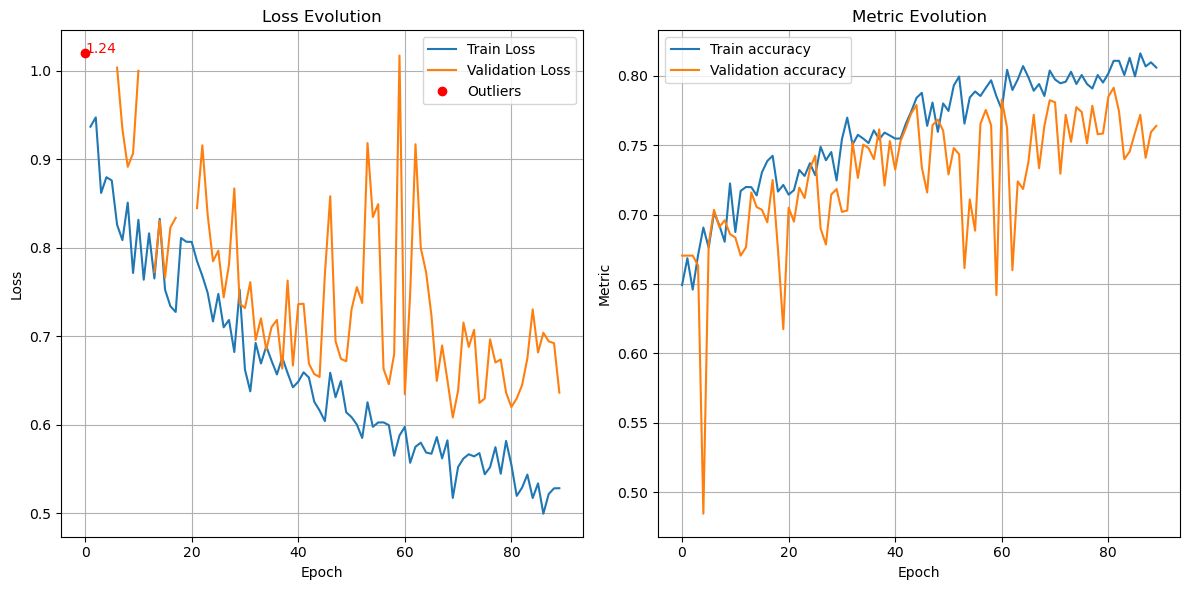

In [7]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes: lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, metrics=METRICS),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20,
    epochs=200)